### Keras 模型建立

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, normalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

Using TensorFlow backend.


###  1. 模型构建

In [2]:
def CNN_():
    model = Sequential()

    model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32, 32, 3)))
    model.add(normalization.BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(normalization.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
                         
    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(normalization.BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(normalization.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(normalization.BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(normalization.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
                         
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))        
    
    model.summary()
    return model

In [3]:
model = CNN_()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

###  2. 定义损失函数和训练模型

In [4]:
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

### 3. 定义可变的学习速率

In [5]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003        
    return lrate

### 4. 加载数据

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### 5. 标准化数据 Z-Score

In [7]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

### 6. 对输出进行One-hot编码

In [8]:
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

### 7. 增广数据集

In [9]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

### 8. 训练模型并保存

In [10]:
checkpoint = ModelCheckpoint('E:\\school\\2-2\\ac_eng\\cifar\\model\\augmented_model.h5',  monitor='val_loss', verbose=0, save_best_only= True, mode='auto') 

model_details = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=x_train.shape[0]/32, epochs=125,
                    verbose=1,validation_data=(x_test,y_test),callbacks=[checkpoint, LearningRateScheduler(lr_schedule)])

scores = model.evaluate(x_test, y_test, batch_size=32, verbose=1)
print('\n Test result: %.3f%% loss: %.3f' % (scores[1]*100, scores[0]))

Epoch 1/125
1563/1562 [==============================] - 1765s 1s/step - loss: 1.8914 - acc: 0.4028 - val_loss: 1.5078 - val_acc: 0.5315
Epoch 2/125
1563/1562 [==============================] - 1461s 935ms/step - loss: 1.4010 - acc: 0.5415 - val_loss: 1.2484 - val_acc: 0.6253
Epoch 3/125
1563/1562 [==============================] - 1573s 1s/step - loss: 1.2907 - acc: 0.5818 - val_loss: 1.4088 - val_acc: 0.6032
Epoch 4/125
1563/1562 [==============================] - 1376s 880ms/step - loss: 1.2350 - acc: 0.6051 - val_loss: 1.4834 - val_acc: 0.5915
Epoch 5/125
1563/1562 [==============================] - 1352s 865ms/step - loss: 1.2080 - acc: 0.6156 - val_loss: 1.2144 - val_acc: 0.6394
Epoch 6/125
1563/1562 [==============================] - 1357s 868ms/step - loss: 1.1850 - acc: 0.6252 - val_loss: 1.2040 - val_acc: 0.6556
Epoch 7/125
1563/1562 [==============================] - 1359s 870ms/step - loss: 1.1709 - acc: 0.6305 - val_loss: 1.1757 - val_acc: 0.6589
Epoch 8/125
1563/1562 [===

1563/1562 [==============================] - 698s 447ms/step - loss: 0.9605 - acc: 0.7047 - val_loss: 0.9071 - val_acc: 0.7430
Epoch 59/125
1563/1562 [==============================] - 698s 446ms/step - loss: 0.9592 - acc: 0.7056 - val_loss: 0.9838 - val_acc: 0.7264
Epoch 60/125
1563/1562 [==============================] - 697s 446ms/step - loss: 0.9596 - acc: 0.7041 - val_loss: 0.9304 - val_acc: 0.7346
Epoch 61/125
1563/1562 [==============================] - 698s 446ms/step - loss: 0.9613 - acc: 0.7069 - val_loss: 0.9204 - val_acc: 0.7352
Epoch 62/125
1563/1562 [==============================] - 697s 446ms/step - loss: 0.9581 - acc: 0.7051 - val_loss: 0.9345 - val_acc: 0.7328
Epoch 63/125
1563/1562 [==============================] - 698s 447ms/step - loss: 0.9628 - acc: 0.7061 - val_loss: 0.9389 - val_acc: 0.7299
Epoch 64/125
1563/1562 [==============================] - 698s 446ms/step - loss: 0.9625 - acc: 0.7029 - val_loss: 1.0181 - val_acc: 0.7152
Epoch 65/125
1563/1562 [=========

1563/1562 [==============================] - 698s 446ms/step - loss: 0.8484 - acc: 0.7337 - val_loss: 0.8390 - val_acc: 0.7606
Epoch 117/125
1563/1562 [==============================] - 700s 448ms/step - loss: 0.8486 - acc: 0.7334 - val_loss: 0.8797 - val_acc: 0.7483
Epoch 118/125
1563/1562 [==============================] - 697s 446ms/step - loss: 0.8492 - acc: 0.7339 - val_loss: 0.8448 - val_acc: 0.7574
Epoch 119/125
1563/1562 [==============================] - 697s 446ms/step - loss: 0.8512 - acc: 0.7335 - val_loss: 0.7901 - val_acc: 0.7682
Epoch 120/125
1563/1562 [==============================] - 698s 447ms/step - loss: 0.8482 - acc: 0.7356 - val_loss: 0.8555 - val_acc: 0.7509
Epoch 121/125
1563/1562 [==============================] - 697s 446ms/step - loss: 0.8472 - acc: 0.7345 - val_loss: 0.8322 - val_acc: 0.7593
Epoch 122/125
1563/1562 [==============================] - 697s 446ms/step - loss: 0.8457 - acc: 0.7358 - val_loss: 0.8458 - val_acc: 0.7579
Epoch 123/125
1563/1562 [==

### 9. 准确率/误差曲线

In [46]:
import matplotlib.pyplot as plt

def plot_model_details(model_details):
    plt.figure(figsize=(15, 5))
     # plot model accuracy
    plt.subplot(1, 2, 1)
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.plot(range(1, len(model_details.history['acc'])+1), model_details.history['acc'])
    plt.plot(range(1, len(model_details.history['val_acc'])+1), model_details.history['val_acc'])
    plt.xticks(np.arange(1, len(model_details.history['acc'])+len(model_details.history['acc'])/10, len(model_details.history['acc'])/10))
    plt.legend(['train', 'validation'], loc='best')
    
    # plot model loss
    plt.subplot(1, 2, 2)
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.plot(range(1, len(model_details.history['loss'])+1), model_details.history['loss'])
    plt.plot(range(1, len(model_details.history['val_loss'])+1), model_details.history['val_loss'])
    plt.xticks(np.arange(1, len(model_details.history['loss'])+len(model_details.history['loss'])/10, len(model_details.history['loss'])/10))
    plt.legend(['train', 'validation'], loc='best')

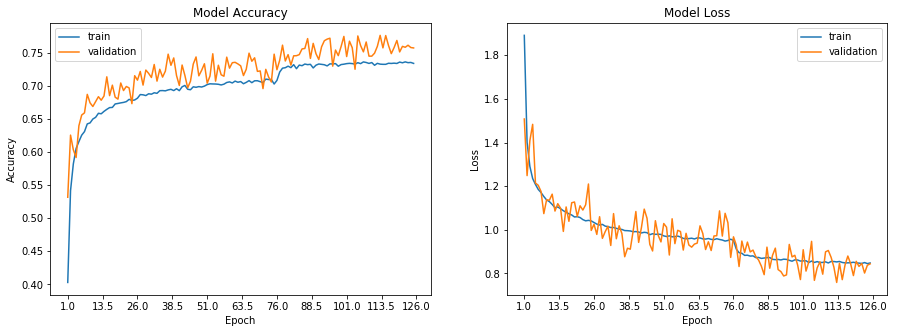

In [47]:
plot_model_details(model_details)